# Handling Missing Numeric Data

In [35]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [36]:
# load titanic dataset from seaborn
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
# create a new feature 'family' by combining 'sibsp' and 'parch'
df['family'] = df['sibsp']+ df['parch']

In [65]:
# select relevant columns
df = df[['age', 'fare', 'family', 'survived']]

In [66]:
# display the first few rows of the dataframe
df.head()

,age,fare,family,survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [67]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       714 non-null    float64
 1   fare      846 non-null    float64
 2   family    891 non-null    int64  
 3   survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [41]:
# Randomly select 5% of the dataset and set fare to NaN
df.loc[df.sample(frac=0.05, random_state=42).index, "fare"] = np.nan


In [68]:
# check missing value 
df.isnull().mean()

age         0.198653
fare        0.050505
family      0.000000
survived    0.000000
dtype: float64

In [69]:
# split the data into features and target variable
X = df.drop(columns=['survived'])
y = df['survived']

In [70]:
# train test split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [71]:
# check the shape of train and test sets
X_train.shape ,X_test.shape

((712, 3), (179, 3))

In [72]:
# check missing values in training set
X_train.isnull().mean()

age       0.207865
fare      0.050562
family    0.000000
dtype: float64

In [73]:
# calculate mean and median for 'age' and 'fare' in training set
mean_age = X_train['age'].mean()
median_age = X_train['age'].median()

mean_fare= X_train['fare'].mean()
median_fare= X_train['fare'].median()

In [74]:
# create new features by imputing missing values with mean and median
X_train['age_median'] = X_train['age'].fillna(median_age)
X_train['age_mean'] = X_train['age'].fillna(mean_age)

X_train['fare_median'] = X_train['fare'].fillna(median_age)
X_train['fare_mean'] = X_train['fare'].fillna(mean_age)

In [75]:
# show sample of the modified training set
X_train.sample(5)

,age,fare,family,age_median,age_mean,fare_median,fare_mean
683,14.0,46.9000,7,14.0,14.0,46.9000,46.9000
570,62.0,10.5000,0,62.0,62.0,10.5000,10.5000
764,16.0,7.7750,0,16.0,16.0,7.7750,7.7750
681,27.0,76.7292,0,27.0,27.0,76.7292,76.7292
119,2.0,31.2750,6,2.0,2.0,31.2750,31.2750


In [76]:
# compare variances before and after imputation
print('Orignal age variable variance:', X_train['age'].var())
print('Age variance after median imputation:', X_train['age_median'].var())
print('Age variance after mean imputation:', X_train['age_mean'].var())

print('Orignal fare variable variance:', X_train['fare'].var())
print('Fare variance after median imputation', X_train['fare_median'].var())
print('Fare variance after mean imputation:', X_train['fare_mean'].var())

Orignal age variable variance: 204.34951339046142
Age variance after median imputation: 161.98956633460548
Age variance after mean imputation: 161.81262452718676
Orignal fare variable variance: 2470.643159145907
Fare variance after median imputation 2346.35550646571
Fare variance after mean imputation: 2345.9987177081393


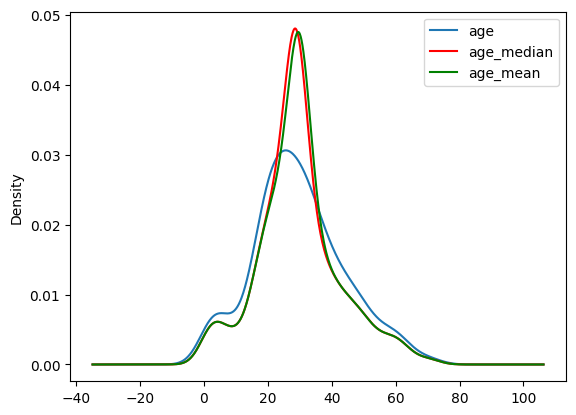

In [77]:
# plot the distributions
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
X_train['age'].plot(kind='kde', ax=ax)

#variable imputed with median
X_train['age_median'].plot(kind='kde', ax=ax, color='red')
X_train['age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

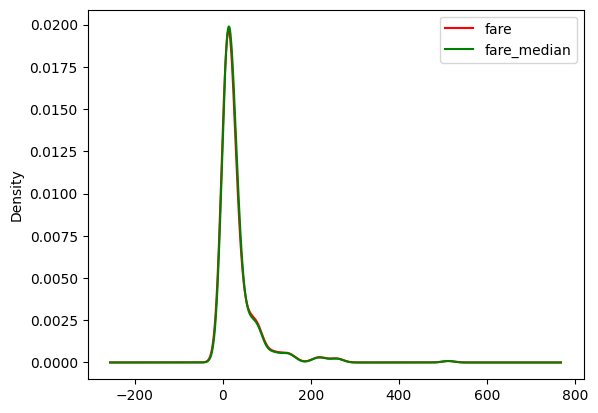

In [78]:
# plot the distributions for fare
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
X_train['fare'].plot(kind='kde', ax=ax, color='red')

#variable imputed with median
X_train['fare_median'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [79]:
# calculate covariance matrix
X_train.cov()

,age,fare,family,age_median,age_mean,fare_median,fare_mean
age,204.349513,73.136773,-6.498901,204.349513,204.349513,70.755902,70.588060
fare,73.136773,2470.643159,17.347633,60.812684,58.461555,2470.643159,2470.643159
family,-6.498901,17.347633,2.735252,-5.112563,-5.146106,16.507178,16.497601
age_median,204.349513,60.812684,-5.112563,161.989566,161.812625,58.268673,58.133480
age_mean,204.349513,58.461555,-5.146106,161.812625,161.812625,56.027528,55.894624
fare_median,70.755902,2470.643159,16.507178,58.268673,56.027528,2346.355506,2346.151319
fare_mean,70.588060,2470.643159,16.497601,58.133480,55.894624,2346.151319,2345.998718


In [80]:
# calculate correlation matrix
X_train.corr()

,age,fare,family,age_median,age_mean,fare_median,fare_mean
age,1.000000,0.095289,-0.299113,1.000000,1.000000,0.095193,0.094978
fare,0.095289,1.000000,0.209196,0.095217,0.091600,1.000000,1.000000
family,-0.299113,0.209196,1.000000,-0.242883,-0.244610,0.206052,0.205948
age_median,1.000000,0.095217,-0.242883,1.000000,0.999454,0.094514,0.094302
age_mean,1.000000,0.091600,-0.244610,0.999454,1.000000,0.090928,0.090719
fare_median,0.095193,1.000000,0.206052,0.094514,0.090928,1.000000,0.999989
fare_mean,0.094978,1.000000,0.205948,0.094302,0.090719,0.999989,1.000000


<Axes: >

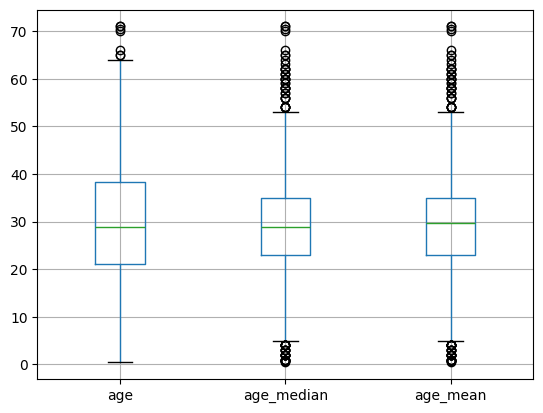

In [81]:
# plot boxplots to compare distributions
X_train[['age', 'age_median', 'age_mean']].boxplot()

<Axes: >

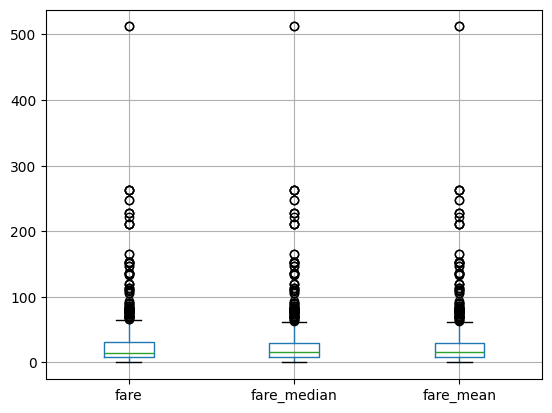

In [82]:
# plot boxplots to compare distributions for fare
X_train[['fare', 'fare_median', 'fare_mean']].boxplot()

# Using Sklearn

In [83]:
# train test split again for further analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# create SimpleImputer instances
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [85]:
# create ColumnTransformer to apply different imputers to different columns
trf = ColumnTransformer([
    ('imputer1', imputer1,['age']),
    ('imputer2', imputer2,['fare'])
],remainder='passthrough')

In [86]:
# fit the transformer on training data
trf.fit(X_train)

C:\Users\FAHAD\AppData\Roaming\Python\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['age']),
                                ('imputer2', SimpleImputer(), ['fare'])])

In [87]:
# check the statistics learned by the imputers
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [88]:
# check the statistics learned by the imputers
trf.named_transformers_['imputer2'].statistics_

array([32.58627612])

In [89]:
# transform the training and testing data
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [90]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.1083,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])